
Created on Tue Aug 21 11:52:01 2018
 
Author: Eric Ávila, PhD student at Kongju National University 
Email:Rexfarell@gmail.com

### Using NLTK as a tool to datamine political speeches  

This is a small script I wrote while  reading  **NLTK book**. It served as a practice of the concepts covered up to chapter 3 about **Natural Language Processing**.    

Originally, I used a set of dependencies to first, webscrape the website of the Newspaper __"El Espectador"__ and then, preprocess the raw text from the article "**El Discurso Completo de Gustavo Petro Plaza de Bolivar**", article 463248. However, maintaining the code was hard to accomplish, given the fact that even small changes in the website had enormous negative implications in how the data was collected and displayed.

In the end, I decided to make a .txt copy of the original speech and upload it to **archive.org**, which is the url we are currently scraping.  

[Speech after losing the presidential polls](https://www.elespectador.com/noticias/bogota/el-discurso-completo-de-gustavo-petro-plaza-de-bolivar-articulo-463248 "Transcript")       
 

![PHOTOGRAPH](http://www.portafolio.co/files/article_multimedia/uploads/2018/03/11/5aa5e68aaf1d9.jpeg "Gustavo Petro") 

### The first block is the libraries used for this project  

In [57]:
import nltk
import re, pprint
from urllib import request
from bs4 import BeautifulSoup as bs
from nltk import word_tokenize, sent_tokenize
import requests
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import corpus
from IPython.display import HTML
from IPython.display import Audio, Image, YouTubeVideo
 

This second block, instantiates stopwords. The __Stopwords__ set includes the predetermined stopwords in NLTK, but here it can be customized to include more. Likewise, "Words to remove" serves to __customize__ the stopwords set by  eliminating words from the filtering list. 

In [58]:

noise_words = (stopwords.words("spanish"))
print("los stopwords al empezar son: ", len(noise_words))

##Adds words to stopwords

words_to_add=["cada","aquí", "hoy", "si", ",", "."]
for w in words_to_add:
   if w not in noise_words:
        noise_words.append(w)
 

##Removes words from stopwords
       
words_to_remove=["yo", "no"]
for w in words_to_remove:
   if w in noise_words:
        noise_words.remove(w)  

print("Number of stopwords in the beginning:", len(noise_words))

los stopwords al empezar son:  313
Number of stopwords in the beginning: 317


 The **number of stopwords** when you first execute the script is changed by the filtering that takes place in the stopwords code. The following code prints the total stopwords after the process.

In [59]:
print("The number of stopwords in the end is:", len(noise_words))

The number of stopwords in the end is: 317


NLTK book uses a **Beautifulsoup** code that does not work on this specific website, which triggers a **bad request error**. Apparently, the method is detected as a bot, for that reason I had to find an Alternative web scrapping method to circumvent the the error.  

In [60]:
# The book's method raised a bad request error when webscrapping certain websites
#This is an alternative method
headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)     Chrome/37.0.2049.0 Safari/537.36'}
url="https://ia601407.us.archive.org/10/items/dicurso_petro_2013/dicurso_petro_2013.txt"
 
r = requests.get(url, headers=headers)
print (r)
print ("headers",r.headers)
 
 
html = request.urlopen(url).read().decode("utf8")
html[:100]



<Response [200]>
headers {'Server': 'nginx/1.14.0 (Ubuntu)', 'Date': 'Sat, 02 Nov 2019 03:45:13 GMT', 'Content-Type': 'text/plain; charset=utf-8', 'Last-Modified': 'Fri, 01 Nov 2019 13:48:53 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'ETag': 'W/"5dbc37c5-4589"', 'Expires': 'Sat, 02 Nov 2019 09:45:13 GMT', 'Cache-Control': 'max-age=21600', 'Strict-Transport-Security': 'max-age=15724800', 'Content-Encoding': 'gzip'}


'\r\n\r\n\r\nEste es el discurso completo de Gustavo Petro en la Plaza de Bolívar\r\nBogotá\r\n10 Dic 2013 - 9:'

-If you only want the text part of a document or tag, you can use the get_text() method.
-It returns all the text in a document or beneath a tag, as a single Unicode string.
This text, as any other human text, contains words that are not informative for the program. Prepositions, for example, are removed because **their practical semantic content is next to null** and yet, they make for most of the tokens in the speech. The following code counts the tokens before they are extracted.

In [61]:
raw=bs(html, "html.parser").get_text()
print("The number of tokens before filtering is :" ,len(raw))

The number of tokens before filtering is : 17449


This obtains the **tokens** from the **raw text** and stores them in the variable tokens. This means that it separates words and punctuation into discrete units, since the separation has to be made explicitly for the machine, so that it can carry out other methods on our corpus.   

In [63]:
tokens= word_tokenize(raw)

The tokens are still mixed with **unwanted material** concerning site navigation and other types of noise.
It takes patience and some trial and error to find the specific __beginning__ and __end indexes__ of the content. I try to use hapaxes (words used a single time) to get as close to the "borders" of the text as possible in the first attempt.  
**If you want to recreate the process** and see how it actually works just remove the hastags(#) and run the cell. Beware it can be a little bit overwhelming to do this in a less controlled environment, such as a commercial website.   

In [62]:
#print (raw[20117:37210])
#tokens = tokens[20117:37210]

In [64]:
print("BEGINNING OF THE SPEECH>>>",tokens.index("inmediato"))
print("END OF THE SPEECH>>>",tokens.index("patria"))
tokens=tokens[49:3380]
print("MY SWEET, SWEET TOKENS \'COURTESY\' of El ESPECTADOR'>>>>",tokens)

BEGINNING OF THE SPEECH>>> 3231
END OF THE SPEECH>>> 3256
MY SWEET, SWEET TOKENS 'COURTESY' of El ESPECTADOR'>>>> ['No', 'va', 'a', 'ser', 'fácil', 'este', 'discurso', ',', 'espero', 'que', 'estas', 'palabras', 'que', 'quiero', 'decirles', 'a', 'ustedes', 'salgan', 'fácilmente', ',', 'sé', 'que', 'aquí', 'están', 'los', 'pobres', 'de', 'la', 'tierra', ',', 'como', 'decía', 'el', 'poeta', ',', 'las', 'trabajadoras', ',', 'los', 'trabajadores', ',', 'la', 'mujer', ',', 'las', 'juventudes', ',', 'los', 'discriminados', ',', 'sé', 'que', 'aquí', 'me', 'acompaña', 'por', 'quienes', 'quisimos', 'gobernar', ',', 'por', 'quienes', 'nos', 'hemos', 'arriesgado', ',', 'por', 'lo', 'que', 'lo', 'vale', 'todo', ',', 'por', 'lo', 'que', 'puede', 'cambiar', 'la', 'historia', ',', 'quiero', 'que', 'ustedes', 'sean', 'conscientes', ',', 'cada', 'uno', 'de', 'ustedes', ',', 'cada', 'una', 'de', 'ustedes', 'que', 'empezamos', 'a', 'vivir', 'días', 'de', 'historia', '.', 'Esto', 'no', 'es', 'una', 'manife

In order to apply certain methods we need to turn our tokens into text by applying the method of the class **TEXT**  

In [65]:
text=Text(tokens)

The **concordance** method in nltk...  

In [70]:
print("Concordance in all its Glory (Contexts in which the word \"quiero\" appears) : >>>>>>>>>>>", end=" " )
print( text.concordance("quiero"))


Concordance in all its Glory (Contexts in which the word "quiero" appears) : >>>>>>>>>>> Displaying 13 of 13 matches:
rso , espero que estas palabras que quiero decirles a ustedes salgan fácilment
 lo que puede cambiar la historia , quiero que ustedes sean conscientes , cada
ocracia , en las prosas de la Paz . Quiero , que los indígenas salgan con sus 
indígenas salgan con sus cabildos , quiero que el movimiento agrario salga a a
alga a abrazar a la Bogotá Humana , quiero que los trabajadores y las trabajad
defensa de la paz y la democracia , quiero que las juventudes animalistas , la
entre aplausos y alegrías un toro , quiero que las juventudes ambientalistas q
n humedal que una losa de cemento , quiero que todas las juventudes de Colombi
o y en los barrios de Bogotá , pero quiero que me acompañen para enseñarle a C
ompañen para enseñarle a Colombia , quiero que nos hagamos aquí un compromiso 
istema del aseo de los operadores . Quiero que seamos conscientes del compromi
, ellos manip

*similar()* finds words used in similar contexts. 

In [66]:
print(text.similar('libertad'))

historia plaza paz democracia trampa orden firma presidencia
generación posibilidad muerte constitución esperanza decisión
conciencia ciudadanía prosa consigna vanguardia ruptura
None


Now we can apply the **dispersion plot** method and see a much more visual result.  

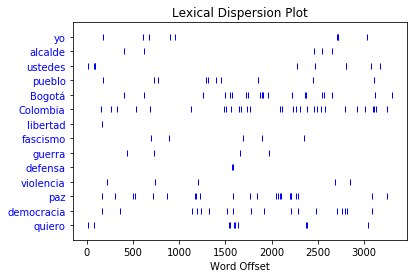

In [72]:
text.dispersion_plot(["yo","alcalde","ustedes","pueblo","Bogotá","Colombia", "libertad","fascismo","guerra", "defensa","violencia", "paz","democracia","quiero"])

Now, the core of the experiment: The **frequency distribution**... 

In [69]:
content_filtered=([word.lower() for word in tokens if word not in noise_words])
fdist=FreqDist(content_filtered).most_common(15)
print(fdist)

 
text_lines=Text(content_filtered)

#Here, we can see how many tokens remain... 
#after they were filtered of stopwords
print("El número de palabras contenidas en el texto después de filtrarlo de stopwords son:\
", len(content_filtered))
 
print("Muestra de palabras en minuscula y sin stopwords",[content_filtered[:10]])
Text(content_filtered).plot(10)


content_filtered=([word.lower() for word in tokens if word not in noise_words])
fdist=FreqDist(content_filtered).most_common(15)
print(fdist)

[('no', 40), ('colombia', 30), ('paz', 27), ('bogotá', 20), ('democracia', 18), ('quiero', 13), ('plaza', 11), ('ustedes', 10), ('historia', 10), ('bolívar', 10), ('pueblo', 10), ('yo', 10), ('alcalde', 8), ('orden', 8), ('diferencia', 8)]
El número de palabras contenidas en el texto después de filtrarlo de stopwords son: 1453
Muestra de palabras en minuscula y sin stopwords [['no', 'va', 'ser', 'fácil', 'discurso', 'espero', 'palabras', 'quiero', 'decirles', 'ustedes']]


<Figure size 640x480 with 1 Axes>

[('no', 40), ('colombia', 30), ('paz', 27), ('bogotá', 20), ('democracia', 18), ('quiero', 13), ('plaza', 11), ('ustedes', 10), ('historia', 10), ('bolívar', 10), ('pueblo', 10), ('yo', 10), ('alcalde', 8), ('orden', 8), ('diferencia', 8)]


In [84]:
# 
from IPython.display import HTML

HTML('<iframe width="580" height="215" src="https://www.youtube.com/embed/fukqaZvoC9w" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


In [82]:

from IPython.core.display import display, HTML
display(HTML("""<a href="https://www.nltk.org/book/ch03.html">NLTK BOOK CHAPTER 3</a>"""))